In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [18]:
class LinearRegression:
    '''
    A class which implements linear regression model with gradient descent.
    '''
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights, self.bias = None, None
        self.loss = []
        
    @staticmethod
    def _mean_squared_error(y, y_hat):
        '''
        Private method, used to evaluate loss at each iteration.
        
        :param: y - array, true values
        :param: y_hat - array, predicted values
        :return: float
        '''
        error = 0
        for i in range(len(y)):
            error += (y[i] - y_hat[i]) ** 2
        return error / len(y)
    
    def fit(self, X, y):
        '''
        Used to calculate the coefficient of the linear regression model.
        
        :param X: array, features
        :param y: array, true values
        :return: None
        '''
        # 1. Initialize weights and bias to zeros
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # 2. Perform gradient descent
        for i in range(self.n_iterations):
            # Line equation
            y_hat = np.dot(X, self.weights) + self.bias
            loss = self._mean_squared_error(y, y_hat)
            
            self.loss.append(loss)
            
            # Calculate derivatives
            partial_w = (1 / X.shape[0]) * (2 * np.dot(X.T, (y_hat - y)))/1000
            print("partial_w printing",partial_w)
            partial_d = (1 / X.shape[0]) * (2 * np.sum(y_hat - y))/1000
            print("partial_d printing", partial_d)
            # Update the coefficients
            self.weights -= self.learning_rate * partial_w
            self.bias -= self.learning_rate * partial_d
            
        print("printing y_hat", y_hat)
        print("printing weights", self.weights)
        print("printing bias", self.bias)
    def predict(self, X):
        '''
        Makes predictions using the line equation.
        
        :param X: array, features
        :return: array, predictions
        '''
        return np.dot(X, self.weights) + self.bias

In [19]:
from sklearn.datasets import load_diabetes

df = pd.read_csv('insurance-mlr.csv')
data1 = df['sex'].to_numpy()
data2 = df['smoker'].to_numpy()
data3 = df['region'].to_numpy()
data1 = data1.reshape(-1,1)
data2 = data2.reshape(-1,1)
data3 = data3.reshape(-1,1)
encoder = OrdinalEncoder()
result1 = encoder.fit_transform(data1)
result2 = encoder.fit_transform(data2)
result3 = encoder.fit_transform(data3)

df['sex'] = result1
df['smoker'] = result2
df['region'] = result3


y = np.array(df['charges'])
df_features = df.drop(['charges'],axis=1)
dataset = df_features.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=0.2, random_state=42)

In [20]:
# print(X)

In [21]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [22]:
# from sklearn.model_selection import train_test_split
# import numpy as np
# import matplotlib.pyplot as plt

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train.shape
# X_train = np.dot(X_train,1000).astype(int)
# X_test = np.dot(X_test,1000).astype(int)
# y_train = np.dot(y_train,1000).astype(int)
# y_test = np.dot(y_test,1000).astype(int)



In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

partial_w printing [-1145.74825812   -14.35260422  -844.36235202   -31.66027474
   -13.06306888   -40.25958496]
partial_d printing -26.692179472728974
partial_w printing [-539.59223308   -7.08211268 -401.74891617  -15.68547483  -10.21095526
  -18.56618666]
partial_d printing -12.486220771603548
partial_w printing [-253.11949316   -3.64505442 -192.49743633   -8.13392802   -8.86242456
   -8.31072939]
partial_d printing -5.770634267038661
partial_w printing [-117.74789073   -2.01991861  -93.54774585   -4.56373294   -8.2245837
   -3.46157047]
partial_d printing -2.5954686406181744
partial_w printing [-53.79528931  -1.2512165  -46.73413402  -2.87537744  -7.92266322
  -1.16778925]
partial_d printing -1.0937370785460587
partial_w printing [-23.59908862  -0.88732599 -24.5639456   -2.07650457  -7.77952425
  -0.08186716]
partial_d printing -0.3829881129436493
partial_w printing [ -9.35766921  -0.71478294 -14.04247168  -1.69806605  -7.71144014
   0.43311535]
partial_d printing -0.0461213898842236

partial_w printing [ 0.51811463 -0.50583819 -0.66902371 -1.25623507 -7.59505919  1.03740623]
partial_d printing 0.34245993718351986
partial_w printing [ 0.5093941  -0.50563516 -0.65712489 -1.25566168 -7.59472157  1.0376646 ]
partial_d printing 0.34273169908742385
partial_w printing [ 0.50082238 -0.5054346  -0.64542922 -1.25509139 -7.59438535  1.03791419]
partial_d printing 0.342999083346288
partial_w printing [ 0.49239695 -0.50523646 -0.63393322 -1.25452417 -7.59405052  1.03815515]
partial_d printing 0.343262164660753
partial_w printing [ 0.4841153  -0.50504071 -0.62263349 -1.25395996 -7.59371704  1.03838762]
partial_d printing 0.3435210164561486
partial_w printing [ 0.47597499 -0.5048473  -0.61152666 -1.2533987  -7.59338491  1.03861175]
partial_d printing 0.34377571090424286
partial_w printing [ 0.46797359 -0.50465619 -0.60060946 -1.25284036 -7.59305409  1.03882769]
partial_d printing 0.3440263189446756
partial_w printing [ 0.46010873 -0.50446735 -0.58987865 -1.25228488 -7.59272456  1

partial_w printing [ 0.06850869 -0.49121502 -0.0558821  -1.1991188  -7.55945901  1.03262153]
partial_d printing 0.35755341073808394
partial_w printing [ 0.06745695 -0.49113957 -0.05445103 -1.19871404 -7.55919465  1.0324317 ]
partial_d printing 0.3575994434925041
partial_w printing [ 0.0664231  -0.49106442 -0.05304438 -1.19830976 -7.55893047  1.03224087]
partial_d printing 0.35764494790712875
partial_w printing [ 0.06540685 -0.49098956 -0.05166175 -1.19790595 -7.55866647  1.03204905]
partial_d printing 0.3576899329663335
partial_w printing [ 0.06440789 -0.490915   -0.05030273 -1.1975026  -7.55840263  1.03185627]
partial_d printing 0.3577344075011197
partial_w printing [ 0.06342593 -0.49084073 -0.0489669  -1.19709971 -7.55813897  1.03166254]
partial_d printing 0.3577783801917207
partial_w printing [ 0.06246068 -0.49076673 -0.04765388 -1.19669727 -7.55787548  1.03146787]
partial_d printing 0.35782185957019996
partial_w printing [ 0.06151185 -0.49069302 -0.04636327 -1.19629528 -7.55761214 

partial_w printing [ 0.01475912 -0.48351628  0.01695815 -1.15356357 -7.52899368  1.00645737]
partial_d printing 0.3609024471266662
partial_w printing [ 0.01461844 -0.4834566   0.01714579 -1.15319058 -7.52873904  1.00622049]
partial_d printing 0.3609214507183634
partial_w printing [ 0.0144801  -0.48339696  0.01733023 -1.15281776 -7.52848444  1.00598354]
partial_d printing 0.36094038327229394
partial_w printing [ 0.01434407 -0.48333736  0.01751152 -1.15244509 -7.52822986  1.0057465 ]
partial_d printing 0.3609592459665619
partial_w printing [ 0.01421031 -0.48327781  0.01768972 -1.15207258 -7.52797531  1.00550939]
partial_d printing 0.36097803995917893
partial_w printing [ 0.01407878 -0.4832183   0.01786487 -1.15170022 -7.5277208   1.00527221]
partial_d printing 0.36099676638838546
partial_w printing [ 0.01394943 -0.48315883  0.01803704 -1.15132803 -7.52746632  1.00503495]
partial_d printing 0.3610154263730005
partial_w printing [ 0.01382225 -0.48309941  0.01820627 -1.15095599 -7.52721186 

partial_w printing [ 7.22560489e-03 -4.76210624e-01  2.66985106e-02 -1.10764407e+00
 -7.49708166e+00  9.76467823e-01]
partial_d printing 0.3629813872382044
partial_w printing [ 7.20676823e-03 -4.76153689e-01  2.67199975e-02 -1.10728739e+00
 -7.49682940e+00  9.76231071e-01]
partial_d printing 0.362996556303706
partial_w printing [ 7.18820049e-03 -4.76096763e-01  2.67411186e-02 -1.10693083e+00
 -7.49657714e+00  9.75994360e-01]
partial_d printing 0.3630117154932786
partial_w printing [ 7.16989709e-03 -4.76039848e-01  2.67618802e-02 -1.10657438e+00
 -7.49632490e+00  9.75757690e-01]
partial_d printing 0.36302686494190634
partial_w printing [ 7.15185352e-03 -4.75982943e-01  2.67822884e-02 -1.10621805e+00
 -7.49607266e+00  9.75521063e-01]
partial_d printing 0.3630420047822883
partial_w printing [ 7.13406538e-03 -4.75926048e-01  2.68023492e-02 -1.10586182e+00
 -7.49582045e+00  9.75284479e-01]
partial_d printing 0.3630571351448535
partial_w printing [ 7.11652832e-03 -4.75869163e-01  2.68220686e

partial_w printing [ 6.01811258e-03 -4.69045249e-01  2.78203253e-02 -1.06322294e+00
 -7.46513207e+00  9.46785850e-01]
partial_d printing 0.3648574267249931
partial_w printing [ 6.01332912e-03 -4.68989271e-01  2.78227898e-02 -1.06288000e+00
 -7.46488116e+00  9.46555464e-01]
partial_d printing 0.3648719363068173
partial_w printing [ 6.00857667e-03 -4.68933299e-01  2.78252132e-02 -1.06253716e+00
 -7.46463026e+00  9.46325131e-01]
partial_d printing 0.3648864430678024
partial_w printing [ 6.00385472e-03 -4.68877333e-01  2.78275962e-02 -1.06219442e+00
 -7.46437937e+00  9.46094853e-01]
partial_d printing 0.3649009470235245
partial_w printing [ 5.99916275e-03 -4.68821374e-01  2.78299395e-02 -1.06185180e+00
 -7.46412849e+00  9.45864628e-01]
partial_d printing 0.3649154481893061
partial_w printing [ 5.99450029e-03 -4.68765421e-01  2.78322438e-02 -1.06150927e+00
 -7.46387762e+00  9.45634458e-01]
partial_d printing 0.3649299465802031
partial_w printing [ 5.98986683e-03 -4.68709473e-01  2.78345097e

partial_w printing [ 5.55944533e-03 -4.62149052e-01  2.79515799e-02 -1.02148350e+00
 -7.43409346e+00  9.18631537e-01]
partial_d printing 0.36663824585316046
partial_w printing [ 5.55632871e-03 -4.62093796e-01  2.79519179e-02 -1.02115324e+00
 -7.43384375e+00  9.18407873e-01]
partial_d printing 0.36665247322156236
partial_w printing [ 5.55321655e-03 -4.62038545e-01  2.79522510e-02 -1.02082308e+00
 -7.43359405e+00  9.18184262e-01]
partial_d printing 0.3666666986068892
partial_w printing [ 5.55010878e-03 -4.61983301e-01  2.79525792e-02 -1.02049302e+00
 -7.43334436e+00  9.17960705e-01]
partial_d printing 0.36668092201138347
partial_w printing [ 5.54700534e-03 -4.61928061e-01  2.79529027e-02 -1.02016306e+00
 -7.43309468e+00  9.17737203e-01]
partial_d printing 0.3666951434372527
partial_w printing [ 5.54390617e-03 -4.61872828e-01  2.79532215e-02 -1.01983319e+00
 -7.43284501e+00  9.17513754e-01]
partial_d printing 0.36670936288668127
partial_w printing [ 5.54081122e-03 -4.61817600e-01  2.79535

partial_w printing [ 5.16943113e-03 -4.54848768e-01  2.79731772e-02 -9.78426434e-01
 -7.40096571e+00  8.89353310e-01]
partial_d printing 0.3685136779170498
partial_w printing [ 5.16661847e-03 -4.54794247e-01  2.79732517e-02 -9.78109231e-01
 -7.40071727e+00  8.89136720e-01]
partial_d printing 0.3685276539056908
partial_w printing [ 5.16380703e-03 -4.54739732e-01  2.79733256e-02 -9.77792124e-01
 -7.40046883e+00  8.88920182e-01]
partial_d printing 0.3685416280649361
partial_w printing [ 5.16099680e-03 -4.54685222e-01  2.79733990e-02 -9.77475112e-01
 -7.40022041e+00  8.88703696e-01]
partial_d printing 0.36855560039540847
partial_w printing [ 5.15818777e-03 -4.54630717e-01  2.79734718e-02 -9.77158198e-01
 -7.39997199e+00  8.88487263e-01]
partial_d printing 0.3685695708977186
partial_w printing [ 5.15537995e-03 -4.54576218e-01  2.79735441e-02 -9.76841379e-01
 -7.39972358e+00  8.88270882e-01]
partial_d printing 0.36858353957248824
partial_w printing [ 5.15257332e-03 -4.54521725e-01  2.7973615

partial_d printing 0.3702741748909332
partial_w printing [ 4.81791046e-03 -4.47914142e-01  2.79799560e-02 -9.38596475e-01
 -7.36924124e+00  8.62051369e-01]
partial_d printing 0.37028792281417927
partial_w printing [ 4.81522451e-03 -4.47860313e-01  2.79799956e-02 -9.38291352e-01
 -7.36899400e+00  8.61841385e-01]
partial_d printing 0.37030166897220823
partial_w printing [ 4.81253942e-03 -4.47806488e-01  2.79800351e-02 -9.37986322e-01
 -7.36874677e+00  8.61631451e-01]
partial_d printing 0.37031541336546453
partial_w printing [ 4.80985519e-03 -4.47752669e-01  2.79800745e-02 -9.37681384e-01
 -7.36849954e+00  8.61421568e-01]
partial_d printing 0.37032915599438654
printing y_hat [12811.69031931 13678.39254235 14577.44419359 ... 16033.08794588
 16799.66682887 16066.6943423 ]
printing weights [194.94097926  50.54077371 186.94847967 116.85426344 750.59301384
 -88.39081211]
printing bias -30.54819505569642


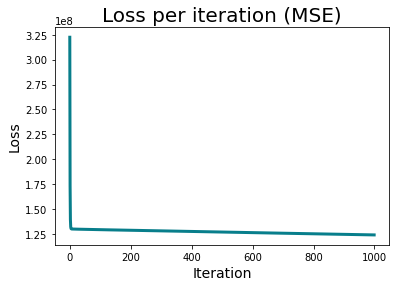

In [24]:
import matplotlib.pyplot as plt
xs = np.arange(len(model.loss))
ys = model.loss

plt.plot(xs, ys, lw=3, c='#087E8B')
plt.title('Loss per iteration (MSE)', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.show()

partial_w printing [-1145.74825812   -14.35260422  -844.36235202   -31.66027474
   -13.06306888   -40.25958496]
partial_d printing -26.692179472728974
partial_w printing [1.88503187e+03 2.19998535e+01 1.36870483e+03 4.82137248e+01
 1.19749925e+00 6.82074065e+01]
partial_d printing 44.33761403289816
partial_w printing [-3076.27013564   -37.4835208  -2252.27689396   -82.49360317
   -22.131506    -109.27412741]
partial_d printing -71.89189737548828
partial_w printing [5043.11418676   59.88612563 3675.21331711  131.45541271   16.06155334
  181.25114491]
partial_d printing 118.36320110412942
partial_w printing [-8246.55367365   -99.46614023 -6025.33867701  -218.69481849
   -46.43896511  -294.21268456]
partial_d printing -193.0059911137968
partial_w printing [13503.964945     161.3565378   9852.39452018   354.41317125
    55.86481161   484.01185301]
partial_d printing 316.62993094362275
partial_w printing [-22095.62261792   -265.52066622 -16133.8438295    -583.5737058
   -111.56658451   -789

partial_w printing [-2.80850055e+30 -3.36774256e+28 -2.05012475e+30 -7.40000062e+28
 -1.32092277e+28 -1.00484345e+29]
partial_d printing -6.580434401227868e+28
partial_w printing [4.59666383e+30 5.51197343e+28 3.35543260e+30 1.21115572e+29
 2.16195005e+28 1.64462404e+29]
partial_d printing 1.0770175845173876e+29
partial_w printing [-7.52334493e+30 -9.02142921e+28 -5.49182576e+30 -1.98229468e+29
 -3.53845670e+28 -2.69175089e+29]
partial_d printing -1.762751220714585e+29
partial_w printing [1.23134345e+31 1.47653442e+29 8.98845358e+30 3.24441534e+29
 5.79138071e+28 4.40558003e+29]
partial_d printing 2.885089260193594e+29
partial_w printing [-2.01533587e+31 -2.41663914e+29 -1.47113731e+31 -5.31012417e+29
 -9.47873420e+28 -7.21059868e+29]
partial_d printing -4.722016323954173e+29
partial_w printing [3.29849374e+31 3.95530552e+29 2.40780571e+31 8.69106316e+29
 1.55138138e+29 1.18015637e+30]
partial_d printing 7.728508948174964e+29
partial_w printing [-5.39863410e+31 -6.47363584e+29 -3.94084

partial_w printing [-9.46433825e+59 -1.13489224e+58 -6.90869515e+59 -2.49371889e+58
 -4.45136457e+57 -3.38621200e+58]
partial_d printing -2.2175340842595394e+58
partial_w printing [1.54902520e+60 1.85747448e+58 1.13074392e+60 4.08146170e+58
 7.28553409e+57 5.54220230e+58]
partial_d printing 3.629430911990459e+58
partial_w printing [-2.53528457e+60 -3.04012251e+58 -1.85068493e+60 -6.68011526e+58
 -1.19242102e+58 -9.07090470e+58]
partial_d printing -5.940277914289846e+58
partial_w printing [4.14949211e+60 4.97575875e+58 3.02901009e+60 1.09333232e+59
 1.95163166e+58 1.48463206e+59]
partial_d printing 9.722433779473046e+58
partial_w printing [-6.79146041e+60 -8.14380836e+58 -4.95757108e+60 -1.78945349e+59
 -3.19422927e+58 -2.42989252e+59]
partial_d printing -1.5912676134032181e+59
partial_w printing [1.11155614e+61 1.33289450e+59 8.11404065e+60 2.92879278e+59
 5.22798478e+58 3.97699728e+59]
partial_d printing 2.604422590989574e+59
partial_w printing [-1.81928037e+61 -2.18154414e+59 -1.3280

partial_w printing [2.71559402e+88 3.25633603e+86 1.98230565e+88 7.15520508e+86
 1.27722601e+86 9.71602747e+86]
partial_d printing 6.362750496671191e+86
partial_w printing [-4.44460400e+88 -5.32963472e+86 -3.24443329e+88 -1.17109012e+87
 -2.09043171e+86 -1.59021910e+87]
partial_d printing -1.0413893297884586e+87
partial_w printing [7.27446910e+88 8.72299603e+86 5.31015355e+88 1.91671943e+87
 3.42140286e+86 2.60270648e+87]
partial_d printing 1.70443857065373e+87
partial_w printing [-1.19061002e+89 -1.42768996e+87 -8.69111125e+88 -3.13708854e+87
 -5.59979907e+86 -4.25984134e+87]
partial_d printing -2.789649133165454e+87
partial_w printing [1.94866759e+89 2.33669557e+87 1.42247139e+89 5.13446273e+87
 9.16517316e+86 6.97206864e+87]
partial_d printing 4.565809774643839e+87
partial_w printing [-3.18937799e+89 -3.82446213e+87 -2.32815435e+89 -8.40355865e+87
 -1.50006095e+87 -1.14111623e+88]
partial_d printing -7.472846190724455e+87
partial_w printing [5.22004471e+89 6.25948488e+87 3.81048274e

partial_d printing 3.018787154157743e+112
partial_w printing [-2.10872853e+114 -2.52862859e+112 -1.53931127e+114 -5.55620058e+112
 -9.91798813e+111 -7.54474496e+112]
partial_d printing -4.940839237507508e+112
partial_w printing [3.45134920e+114 4.13859830e+112 2.51938581e+114 9.09381564e+112
 1.62327393e+112 1.23484598e+113]
partial_d printing 8.086655707830067e+112
partial_w printing [-5.64881215e+114 -6.77363054e+112 -4.12347066e+114 -1.48838188e+113
 -2.65680723e+112 -2.02106846e+113]
partial_d printing -1.3235403419029211e+113
partial_w printing [9.24539271e+114 1.10863793e+113 6.74887118e+114 2.43602985e+113
 4.34838786e+112 3.30787625e+113]
partial_d printing 2.1662342257854815e+113
partial_w printing [-1.51319045e+115 -1.81450414e+113 -1.10458558e+115 -3.98704223e+113
 -7.11699243e+112 -5.41399043e+113]
partial_d printing -3.545468598424195e+113
partial_w printing [2.47663396e+115 2.96979310e+113 1.80787167e+115 6.52557921e+113
 1.16483587e+113 8.86106075e+113]
partial_d printin

partial_w printing [-7.17928498e+140 -8.60885840e+138 -5.24067187e+140 -1.89163977e+139
 -3.37663489e+138 -2.56865090e+139]
partial_d printing -1.6821365329336905e+139
partial_w printing [1.17503127e+141 1.40900909e+139 8.57739082e+140 3.09604073e+139
 5.52652748e+138 4.20410267e+139]
partial_d printing 2.753147459673249e+139
partial_w printing [-1.92316990e+141 -2.30612065e+139 -1.40385880e+141 -5.06727991e+139
 -9.04524977e+138 -6.88084133e+139]
partial_d printing -4.5060676028989507e+139
partial_w printing [3.14764599e+141 3.77442026e+139 2.29769119e+141 8.29360076e+139
 1.48043312e+139 1.12618509e+140]
partial_d printing 7.375066370148325e+139
partial_w printing [-5.15174209e+141 -6.17758151e+139 -3.76062379e+141 -1.35741097e+140
 -2.42302014e+139 -1.84322352e+140]
partial_d printing -1.2070747435990594e+140
partial_w printing [8.43183972e+141 1.01108278e+140 6.15500087e+141 2.22167018e+140
 3.96574928e+139 3.01679801e+140]
partial_d printing 1.975615355181451e+140
partial_w printi

<ipython-input-18-3bef0f1453f3>:22: RuntimeWarning: overflow encountered in double_scalars
  error += (y[i] - y_hat[i]) ** 2


 [4.08318919e+161 4.89625326e+159 2.98061085e+161 1.07586244e+160
 1.92044739e+159 1.46090977e+160]
partial_d printing 9.56708324366112e+159
partial_w printing [-6.68294262e+161 -8.01368199e+159 -4.87835621e+161 -1.76086060e+160
 -3.14319007e+159 -2.39106633e+160]
partial_d printing -1.5658414411124607e+160
partial_w printing [1.09379507e+162 1.31159676e+160 7.98438993e+161 2.88199488e+160
 5.14444909e+159 3.91345058e+160]
partial_d printing 2.5628076564815967e+160
partial_w printing [-1.79021088e+162 -2.14668620e+160 -1.30680254e+162 -4.71695176e+160
 -8.41990330e+159 -6.40513199e+160]
partial_d printing -4.194539058472249e+160
partial_w printing [2.93003240e+162 3.51347440e+160 2.13883951e+162 7.72021980e+160
 1.37808287e+160 1.04832589e+161]
partial_d printing 6.865188602254987e+160
partial_w printing [-4.79557461e+162 -5.75049227e+160 -3.50063176e+162 -1.26356589e+161
 -2.25550380e+160 -1.71579162e+161]
partial_d printing -1.1236232131236346e+161
partial_w printing [7.84890156e+162

partial_w printing [2.01820939e+175 2.42008486e+173 1.47323490e+175 5.31769549e+173
 9.49224925e+172 7.22087976e+173]
partial_d printing 4.7287491110677725e+173
partial_w printing [-3.30319682e+175 -3.96094511e+173 -2.41123883e+175 -8.70345513e+173
 -1.55359339e+173 -1.18183907e+174]
partial_d printing -7.739528479215053e+173
partial_w printing [5.40633163e+175 6.48286614e+173 3.94646684e+175 1.42449171e+174
 2.54276130e+173 1.93431221e+174]
partial_d printing 1.2667261399083844e+174
partial_w printing [-8.84852561e+175 -1.06104862e+174 -6.45916960e+175 -2.33146100e+174
 -4.16172926e+173 -3.16588258e+174]
partial_d printing -2.0732466038938015e+174
partial_w printing [1.44823534e+176 1.73661486e+174 1.05717021e+176 3.81589473e+174
 6.81148890e+173 5.18158985e+174]
partial_d printing 3.3932760563921546e+174
partial_w printing [-2.37032214e+176 -2.84231197e+174 -1.73026709e+176 -6.24546264e+174
 -1.11483420e+174 -8.48069146e+174]
partial_d printing -5.5537640207677375e+174
partial_w prin

partial_w printing [5.13663589e+190 6.15946730e+188 3.74959670e+190 1.35343070e+189
 2.41591524e+188 1.83781873e+189]
partial_d printing 1.2035352992787342e+189
partial_w printing [-8.40711547e+190 -1.00811803e+189 -6.13695287e+190 -2.21515569e+189
 -3.95412071e+188 -3.00795201e+189]
partial_d printing -1.9698223580326628e+189
partial_w printing [1.37598989e+191 1.64998355e+189 1.00443310e+191 3.62553819e+189
 6.47169667e+188 4.92310539e+189]
partial_d printing 3.224001925436439e+189
partial_w printing [-2.25207823e+191 -2.70052277e+189 -1.64395244e+191 -5.93390672e+189
 -1.05922051e+189 -8.05763078e+189]
partial_d printing -5.276713594417179e+189
partial_w printing [3.68596920e+191 4.41993695e+189 2.69065167e+191 9.71200606e+189
 1.73362281e+189 1.31878984e+190]
partial_d printing 8.636380188804579e+189
partial_w printing [-6.03281395e+191 -7.23409660e+189 -4.40378095e+191 -1.58956091e+190
 -2.83741489e+189 -2.15845910e+190]
partial_d printing -1.4135135711077848e+190
partial_w printi

partial_w printing [-2.13973294e+206 -2.56580675e+204 -1.56194360e+206 -5.63789281e+204
 -1.00638113e+204 -7.65567455e+204]
partial_d printing -5.0134838738895425e+204
partial_w printing [3.50209403e+206 4.19944767e+204 2.55642807e+206 9.22752105e+204
 1.64714076e+204 1.25300179e+205]
partial_d printing 8.205552950829278e+204
partial_w printing [-5.73186604e+206 -6.87322251e+204 -4.18409761e+206 -1.51026541e+205
 -2.69586998e+204 -2.05078401e+205]
partial_d printing -1.3430002154694585e+205
partial_w printing [9.38132674e+206 1.12493812e+205 6.84809912e+206 2.47184654e+205
 4.41232174e+204 3.35651160e+205]
partial_d printing 2.1980841383379654e+205
partial_w printing [-1.53543873e+207 -1.84118261e+205 -1.12082618e+207 -4.04566329e+205
 -7.22163282e+204 -5.49359176e+205]
partial_d printing -3.597597247982594e+205
partial_w printing [2.51304764e+207 3.01345766e+205 1.83445261e+207 6.62152411e+205
 1.18196232e+205 8.99134398e+205]
partial_d printing 5.888175858672214e+205
partial_w printi

partial_w printing [ 1.96392391 -0.53435577 -2.64218271 -1.31671673 -7.62861774  0.97194149]
partial_d printing 0.298746437411717
partial_w printing [ 1.9305244  -0.5337441  -2.59659716 -1.31563797 -7.62804747  0.9736618 ]
partial_d printing 0.29974394771108137
partial_w printing [ 1.89769505 -0.53314186 -2.55178987 -1.31457079 -7.62748257  0.97534828]
partial_d printing 0.30072469290334325
partial_w printing [ 1.86542612 -0.5325489  -2.50774755 -1.313515   -7.62692294  0.97700152]
partial_d printing 0.30168895917454475
partial_w printing [ 1.83370804 -0.53196506 -2.46445715 -1.31247039 -7.6263685   0.97862208]
partial_d printing 0.30263702782440866
partial_w printing [ 1.80253141 -0.53139017 -2.42190582 -1.31143679 -7.62581916  0.98021052]
partial_d printing 0.3035691753499751
partial_w printing [ 1.77188698 -0.5308241  -2.38008095 -1.310414   -7.62527483  0.98176739]
partial_d printing 0.3044856735276868
partial_w printing [ 1.74176567 -0.53026668 -2.33897013 -1.30940185 -7.62473542 

partial_w printing [ 0.24671328 -0.49876796 -0.29876723 -1.23337567 -7.58126815  1.0421587 ]
partial_d printing 0.35111366494347873
partial_w printing [ 0.24262367 -0.49864179 -0.29318958 -1.23290059 -7.58097447  1.04214456]
partial_d printing 0.35124917989874205
partial_w printing [ 0.23860383 -0.49851678 -0.28770715 -1.23242703 -7.58068145  1.04212635]
partial_d printing 0.35138264167704036
partial_w printing [ 0.23465255 -0.4983929  -0.28231832 -1.23195497 -7.58038909  1.04210411]
partial_d printing 0.3515140852948651
partial_w printing [ 0.23076868 -0.49827015 -0.27702149 -1.23148438 -7.58009737  1.04207794]
partial_d printing 0.3516435451708938
partial_w printing [ 0.22695106 -0.4981485  -0.2718151  -1.23101524 -7.57980629  1.04204789]
partial_d printing 0.35177105513621115
partial_w printing [ 0.22319855 -0.49802794 -0.26669758 -1.23054753 -7.57951582  1.04201403]
partial_d printing 0.35189664844431257
partial_w printing [ 0.21951006 -0.49790843 -0.26166743 -1.23008122 -7.5792259

partial_w printing [ 0.03427965 -0.48792663 -0.00937203 -1.18052567 -7.54718767  1.02286166]
partial_d printing 0.35926772025523834
partial_w printing [ 0.03380963 -0.48786108 -0.00873495 -1.18013802 -7.54692924  1.02264011]
partial_d printing 0.3592965520603442
partial_w printing [ 0.03334758 -0.48779566 -0.00810874 -1.17975065 -7.5466709   1.02241814]
partial_d printing 0.35932514752007644
partial_w printing [ 3.28933666e-02 -4.87730384e-01 -7.49322048e-03 -1.17936355e+00
 -7.54641264e+00  1.02219577e+00]
partial_d printing 0.3593535106341476
partial_w printing [ 3.24468486e-02 -4.87665239e-01 -6.88820878e-03 -1.17897671e+00
 -7.54615446e+00  1.02197300e+00]
partial_d printing 0.359381645333992
partial_w printing [ 3.20078979e-02 -4.87600225e-01 -6.29352503e-03 -1.17859015e+00
 -7.54589636e+00  1.02174985e+00]
partial_d printing 0.3594095554839261
partial_w printing [ 3.15763853e-02 -4.87535340e-01 -5.70899291e-03 -1.17820385e+00
 -7.54563834e+00  1.02152631e+00]
partial_d printing 0

partial_w printing [ 0.00959734 -0.48022791  0.0237601  -1.13290266 -7.51477444  0.99312181]
partial_d printing 0.36188366485412937
partial_w printing [ 0.00954174 -0.48016996  0.02383167 -1.13253761 -7.51452115  0.99288318]
partial_d printing 0.3619000538906094
partial_w printing [ 0.00948703 -0.48011203  0.02390203 -1.13217268 -7.51426787  0.99264455]
partial_d printing 0.361916414597236
partial_w printing [ 0.00943321 -0.48005412  0.02397119 -1.13180789 -7.51401461  0.99240593]
partial_d printing 0.36193274742347553
partial_w printing [ 0.00938025 -0.47999623  0.02403916 -1.13144322 -7.51376137  0.99216732]
partial_d printing 0.36194905281110906
partial_w printing [ 0.00932814 -0.47993837  0.02410598 -1.13107868 -7.51350815  0.99192871]
partial_d printing 0.3619653311944025
partial_w printing [ 0.00927687 -0.47988052  0.02417166 -1.13071427 -7.51325495  0.99169011]
partial_d printing 0.3619815830001998
partial_w printing [ 0.00922642 -0.47982269  0.02423622 -1.13034999 -7.51300176  

partial_w printing [ 6.44663819e-03 -4.72810480e-01  2.75105639e-02 -1.08644053e+00
 -7.48196602e+00  9.62343218e-01]
partial_d printing 0.3638777348806344
partial_w printing [ 6.43796843e-03 -4.72754057e-01  2.75182497e-02 -1.08609048e+00
 -7.48171442e+00  9.62109291e-01]
partial_d printing 0.3638924877061162
partial_w printing [ 6.42939496e-03 -4.72697641e-01  2.75258053e-02 -1.08574054e+00
 -7.48146284e+00  9.61875415e-01]
partial_d printing 0.36390723575944156
partial_w printing [ 6.42091618e-03 -4.72641233e-01  2.75332330e-02 -1.08539070e+00
 -7.48121127e+00  9.61641590e-01]
partial_d printing 0.3639219790889608
partial_w printing [ 6.41253046e-03 -4.72584831e-01  2.75405348e-02 -1.08504097e+00
 -7.48095971e+00  9.61407816e-01]
partial_d printing 0.36393671774219555
partial_w printing [ 6.40423625e-03 -4.72528438e-01  2.75477130e-02 -1.08469135e+00
 -7.48070816e+00  9.61174093e-01]
partial_d printing 0.3639514517658845
partial_w printing [ 6.39603199e-03 -4.72472051e-01  2.7554769

partial_d printing 0.3656947082421609
partial_w printing [ 5.77558593e-03 -4.65752852e-01  2.79136317e-02 -1.04316690e+00
 -7.45034513e+00  9.33285776e-01]
partial_d printing 0.36570907357081
partial_w printing [ 5.77198088e-03 -4.65697226e-01  2.79145594e-02 -1.04283006e+00
 -7.45009480e+00  9.33058590e-01]
partial_d printing 0.36572343666461826
partial_w printing [ 5.76838764e-03 -4.65641605e-01  2.79154722e-02 -1.04249332e+00
 -7.44984447e+00  9.32831459e-01]
partial_d printing 0.3657377975296172
partial_w printing [ 5.76480601e-03 -4.65585990e-01  2.79163703e-02 -1.04215668e+00
 -7.44959416e+00  9.32604382e-01]
partial_d printing 0.365752156171737
partial_w printing [ 5.76123582e-03 -4.65530381e-01  2.79172539e-02 -1.04182014e+00
 -7.44934386e+00  9.32377359e-01]
partial_d printing 0.365766512596824
partial_w printing [ 5.75767689e-03 -4.65474778e-01  2.79181235e-02 -1.04148371e+00
 -7.44909356e+00  9.32150391e-01]
partial_d printing 0.3657808668106166
partial_w printing [ 5.754129

partial_w printing [ 5.38452814e-03 -4.58953442e-01  2.79651202e-02 -1.00249299e+00
 -7.41962611e+00  9.05747803e-01]
partial_d printing 0.3674602134826366
partial_w printing [ 5.38159459e-03 -4.58898509e-01  2.79652753e-02 -1.00216849e+00
 -7.41937695e+00  9.05527249e-01]
partial_d printing 0.3674743287812111
partial_w printing [ 5.37866323e-03 -4.58843582e-01  2.79654286e-02 -1.00184409e+00
 -7.41912780e+00  9.05306748e-01]
partial_d printing 0.3674884421890876
partial_w printing [ 5.37573404e-03 -4.58788660e-01  2.79655801e-02 -1.00151978e+00
 -7.41887867e+00  9.05086300e-01]
partial_d printing 0.36750255370737944
partial_w printing [ 5.37280700e-03 -4.58733744e-01  2.79657297e-02 -1.00119557e+00
 -7.41862954e+00  9.04865905e-01]
partial_d printing 0.3675166633371774
partial_w printing [ 5.36988207e-03 -4.58678834e-01  2.79658776e-02 -1.00087147e+00
 -7.41838042e+00  9.04645564e-01]
partial_d printing 0.36753077107957177
partial_w printing [ 5.36695925e-03 -4.58623929e-01  2.7966023

partial_w printing [ 5.11340282e-03 -4.53759388e-01  2.79745696e-02 -9.72100609e-01
 -7.39599860e+00  8.85031443e-01]
partial_d printing 0.36879285079717306
partial_w printing [ 5.11061345e-03 -4.53704976e-01  2.79746343e-02 -9.71785324e-01
 -7.39575034e+00  8.84815898e-01]
partial_d printing 0.36880679031235597
partial_w printing [ 5.10782519e-03 -4.53650570e-01  2.79746986e-02 -9.71470135e-01
 -7.39550209e+00  8.84600405e-01]
partial_d printing 0.36882072800999816
partial_w printing [ 5.10503803e-03 -4.53596169e-01  2.79747625e-02 -9.71155041e-01
 -7.39525386e+00  8.84384964e-01]
partial_d printing 0.36883466389066666
partial_w printing [ 5.10225197e-03 -4.53541773e-01  2.79748261e-02 -9.70840043e-01
 -7.39500563e+00  8.84169576e-01]
partial_d printing 0.36884859795491776
partial_w printing [ 5.09946701e-03 -4.53487383e-01  2.79748892e-02 -9.70525140e-01
 -7.39475741e+00  8.83954239e-01]
partial_d printing 0.36886253020331694
partial_w printing [ 5.09668315e-03 -4.53432998e-01  2.797

partial_w printing [-702.19601889   -9.03213881 -520.45954318  -19.97021743  -10.97585354
  -24.38456359]
partial_d printing -16.29646362508418
partial_w printing [-664.97365332   -8.5856066  -493.27479978  -18.98912069  -10.80066905
  -23.05221158]
partial_d printing -15.423986362534992
partial_w printing [-629.71449806   -8.16261605 -467.52316655  -18.05975228  -10.6347183
  -21.79010162]
partial_d printing -14.597508520180401
partial_w printing [-596.31502474   -7.76192571 -443.12907071  -17.17938436  -10.47751434
  -20.5945296 ]
partial_d printing -13.81460438403901
partial_w printing [-564.67716446   -7.38235963 -420.02092475  -16.34543295  -10.32859593
  -19.46198675]
partial_d printing -13.072976157546528
partial_w printing [-534.70801986   -7.02280383 -398.13091623  -15.55545034  -10.18752616
  -18.38914933]
partial_d printing -12.370447215966953
partial_w printing [-506.31959244   -6.68220313 -377.39480872  -14.8071179   -10.05389113
  -17.37286886]
partial_d printing -11.7049

partial_w printing [ 2.16229837 -0.56488091 -4.80092062 -1.37311885 -7.64980818  0.8811936 ]
partial_d printing 0.2448986307261167
partial_w printing [ 2.20460738 -0.56421878 -4.75910701 -1.3717207  -7.64950996  0.88317746]
partial_d printing 0.24616713475259627
partial_w printing [ 2.24441906 -0.56358686 -4.71913505 -1.37038875 -7.64922361  0.88507113]
partial_d printing 0.24737665464951772
partial_w printing [ 2.28186555 -0.56298355 -4.68090822 -1.36911955 -7.64894851  0.88687932]
partial_d printing 0.24853028751955691
partial_w printing [ 2.31707204 -0.56240735 -4.64433514 -1.36790977 -7.64868408  0.88860653]
partial_d printing 0.24963096716577768
partial_w printing [ 2.3501571  -0.56185684 -4.6093292  -1.36675631 -7.64842974  0.89025699]
partial_d printing 0.25068147270305263
partial_w printing [ 2.38123306 -0.56133068 -4.57580837 -1.36565619 -7.64818498  0.89183473]
partial_d printing 0.2516844367153044
partial_w printing [ 2.41040631 -0.56082758 -4.54369497 -1.36460662 -7.6479493

partial_w printing [ 2.483135   -0.54377675 -3.35325169 -1.33271957 -7.63697551  0.94455403]
partial_d printing 0.28321043573301435
partial_w printing [ 2.47896741 -0.54370015 -3.34743631 -1.33259208 -7.63690984  0.94478095]
partial_d printing 0.283337728136328
partial_w printing [ 2.47480384 -0.54362372 -3.34163312 -1.33246482 -7.63684425  0.94500732]
partial_d printing 0.2834647333359507
partial_w printing [ 2.47064445 -0.54354743 -3.33584197 -1.33233779 -7.63677875  0.94523316]
partial_d printing 0.28359145564736576
partial_w printing [ 2.46648938 -0.54347131 -3.33006274 -1.33221098 -7.63671332  0.94545846]
partial_d printing 0.2837178991769812
partial_w printing [ 2.46233877 -0.54339533 -3.32429529 -1.33208438 -7.63664798  0.94568324]
partial_d printing 0.2838440678330994
partial_w printing [ 2.45819276 -0.5433195  -3.31853951 -1.331958   -7.63658271  0.94590751]
partial_d printing 0.2839699653363549
partial_w printing [ 2.45405146 -0.54324382 -3.31279529 -1.33183183 -7.63651752  0

partial_w printing [ 2.01139324 -0.53520622 -2.70697601 -1.31812126 -7.62934604  0.96941241]
partial_d printing 0.29733359686253386
partial_w printing [ 2.00797233 -0.53514371 -2.70230679 -1.31801174 -7.62928825  0.96958925]
partial_d printing 0.29743573242241833
partial_w printing [ 2.00455725 -0.5350813  -2.69764553 -1.31790234 -7.62923052  0.96976575]
partial_d printing 0.2975376961729474
partial_w printing [ 2.001148   -0.53501899 -2.69299224 -1.31779306 -7.62917284  0.9699419 ]
partial_d printing 0.29763948841203225
partial_w printing [ 1.99774456 -0.53495677 -2.6883469  -1.3176839  -7.62911521  0.9701177 ]
partial_d printing 0.29774110943682436
partial_w printing [ 1.99434693 -0.53489464 -2.68370949 -1.31757485 -7.62905764  0.97029317]
partial_d printing 0.2978425595437519
partial_w printing [ 1.9909551  -0.53483262 -2.67908    -1.31746592 -7.62900013  0.97046828]
partial_d printing 0.2979438390285064
partial_w printing [ 1.98756905 -0.53477068 -2.67445841 -1.31735711 -7.62894267

partial_w printing [ 1.64549526 -0.52845546 -2.20757868 -1.30596567 -7.62288253  0.98803864]
partial_d printing 0.3082745939034183
partial_w printing [ 1.64269888 -0.52840329 -2.2037621  -1.30586885 -7.62283062  0.98817843]
partial_d printing 0.3083583611469395
partial_w printing [ 1.63990728 -0.5283512  -2.19995204 -1.30577212 -7.62277875  0.98831794]
partial_d printing 0.30844198802361766
partial_w printing [ 1.63712044 -0.52829918 -2.19614848 -1.30567549 -7.62272693  0.98845716]
partial_d printing 0.3085254747730641
partial_w printing [ 1.63433836 -0.52824725 -2.19235142 -1.30557896 -7.62267516  0.98859611]
partial_d printing 0.3086088216344779
partial_w printing [ 1.63156103 -0.5281954  -2.18856084 -1.30548253 -7.62262343  0.98873477]
partial_d printing 0.3086920288466573
partial_w printing [ 1.62878844 -0.52814362 -2.18477673 -1.30538619 -7.62257175  0.98887315]
partial_d printing 0.30877509664798686
partial_w printing [ 1.62602058 -0.52809192 -2.18099908 -1.30528994 -7.6225201   

partial_w printing [ 1.33728202 -0.52263598 -1.78692578 -1.29482431 -7.61685988  1.00313953]
partial_d printing 0.31752543855705745
partial_w printing [ 1.33501177 -0.52259252 -1.78382736 -1.29473821 -7.61681293  1.00324813]
partial_d printing 0.3175937347013763
partial_w printing [ 1.33274539 -0.52254912 -1.78073424 -1.29465218 -7.61676601  1.00335649]
partial_d printing 0.3176619168875189
partial_w printing [ 1.33048288 -0.52250579 -1.77764639 -1.29456624 -7.61671913  1.00346463]
partial_d printing 0.3177299853100008
partial_w printing [ 1.32822423 -0.52246252 -1.77456381 -1.29448037 -7.61667229  1.00357254]
partial_d printing 0.3177979401630067
partial_w printing [ 1.32596944 -0.52241931 -1.7714865  -1.29439459 -7.61662548  1.00368022]
partial_d printing 0.3178657816403935
partial_w printing [ 1.3237185  -0.52237617 -1.76841444 -1.29430888 -7.61657871  1.00378767]
partial_d printing 0.3179335099356862
partial_w printing [ 1.3214714  -0.52233309 -1.76534763 -1.29422325 -7.61653197  1

partial_w printing [ 1.08337373 -0.51770374 -1.44040002 -1.28471161 -7.6112977   1.01496954]
partial_d printing 0.3251824481442322
partial_w printing [ 1.08153689 -0.51766746 -1.43789321 -1.28463437 -7.61125483  1.01505245]
partial_d printing 0.3252379989883259
partial_w printing [ 1.07970319 -0.51763122 -1.43539068 -1.28455719 -7.61121199  1.01513518]
partial_d printing 0.32529345762907014
partial_w printing [ 1.07787261 -0.51759504 -1.43289242 -1.28448008 -7.61116918  1.01521772]
partial_d printing 0.325348824223842
partial_w printing [ 1.07604516 -0.51755891 -1.43039842 -1.28440303 -7.6111264   1.01530008]
partial_d printing 0.3254040989297547
partial_w printing [ 1.07422083 -0.51752283 -1.42790869 -1.28432604 -7.61108365  1.01538225]
partial_d printing 0.3254592819036411
partial_w printing [ 1.07239961 -0.51748681 -1.4254232  -1.28424912 -7.61104093  1.01546424]
partial_d printing 0.32551437330208277
partial_w printing [ 1.07058151 -0.51745083 -1.42294196 -1.28417226 -7.61099824  1

partial_w printing [ 0.87942675 -0.51360466 -1.16207084 -1.2756617  -7.60623205  1.02386586]
partial_d printing 0.33136868251491214
partial_w printing [ 0.87793802 -0.51357413 -1.1600392  -1.2755916  -7.60619247  1.02392816]
partial_d printing 0.33141399584048237
partial_w printing [ 0.87645184 -0.51354366 -1.15801104 -1.27552155 -7.6061529   1.02399031]
partial_d printing 0.3314592344361663
partial_w printing [ 0.87496819 -0.51351322 -1.15598633 -1.27545156 -7.60611336  1.02405231]
partial_d printing 0.33150439842951057
partial_w printing [ 0.87348708 -0.51348282 -1.15396509 -1.27538162 -7.60607385  1.02411416]
partial_d printing 0.33154948794784544
partial_w printing [ 0.87200849 -0.51345247 -1.15194729 -1.27531173 -7.60603436  1.02417585]
partial_d printing 0.3315945031182771
partial_w printing [ 0.87053243 -0.51342216 -1.14993294 -1.27524189 -7.60599489  1.0242374 ]
partial_d printing 0.3316394440677003
partial_w printing [ 0.86905889 -0.51339189 -1.14792203 -1.27517211 -7.60595545

partial_w printing [ 0.71776295 -0.51022349 -0.94145665 -1.26759986 -7.60164193  1.03033683]
partial_d printing 0.33630680999741425
partial_w printing [ 0.71655016 -0.51019754 -0.93980166 -1.26753545 -7.60160495  1.03038281]
partial_d printing 0.3363440081964505
partial_w printing [ 0.71533943 -0.51017162 -0.9381495  -1.26747109 -7.60156799  1.03042866]
partial_d printing 0.33638114551572934
partial_w printing [ 0.71413077 -0.51014574 -0.93650015 -1.26740677 -7.60153104  1.03047439]
partial_d printing 0.33641822205915006
partial_w printing [ 0.71292418 -0.51011989 -0.93485362 -1.26734249 -7.60149412  1.03052   ]
partial_d printing 0.3364552379304384
partial_w printing [ 0.71171964 -0.51009408 -0.9332099  -1.26727825 -7.60145721  1.03056548]
partial_d printing 0.3364921932331376
partial_w printing [ 0.71051716 -0.5100683  -0.93156899 -1.26721405 -7.60142033  1.03061085]
partial_d printing 0.33652908807061765
partial_w printing [ 0.70931673 -0.51004256 -0.92993088 -1.2671499  -7.60138346

partial_w printing [-652.58413011   -8.43692864 -484.22283307  -18.66247289  -10.74232833
  -22.60858498]
partial_d printing -15.13349269939467
partial_w printing [-649.12356883   -8.39541328 -481.69537783  -18.57125808  -10.72604064
  -22.48471234]
partial_d printing -15.052376226837904
partial_w printing [-645.68125973   -8.3541168  -479.18124639  -18.48052418  -10.7098388
  -22.36149274]
partial_d printing -14.971687416231553
partial_w printing [-642.25710655   -8.31303802 -476.68036848  -18.39026867  -10.69372236
  -22.23892274]
partial_d printing -14.891424012362277
partial_w printing [-638.85101356   -8.27217582 -474.19267421  -18.30048903  -10.67769086
  -22.11699893]
partial_d printing -14.811583771909367
partial_w printing [-635.46288551   -8.23152904 -471.71809407  -18.21118274  -10.66174385
  -21.99571788]
partial_d printing -14.732164463382013
partial_w printing [-632.09262766   -8.19109654 -469.25655889  -18.12234732  -10.6458809
  -21.87507622]
partial_d printing -14.6531

partial_w printing [-333.44980439   -4.6077516  -251.09628027  -10.24949977   -9.2398911
  -11.18310753]
partial_d printing -7.651793932157328
partial_w printing [-331.67257239   -4.58642185 -249.79763569  -10.20263892   -9.23152081
  -11.11946343]
partial_d printing -7.610119291404953
partial_w printing [-329.90471565   -4.56520452 -248.505835    -10.15602511   -9.22319462
  -11.05615476]
partial_d printing -7.568664322350427
partial_w printing [-328.14618471   -4.54409903 -247.22084211  -10.10965702   -9.2149123
  -10.99317978]
partial_d printing -7.527427866594523
partial_w printing [-326.3969304    -4.52310477 -245.94262111  -10.06353336   -9.2066736
  -10.9305367 ]
partial_d printing -7.486408771846705
partial_w printing [-324.65690381   -4.50222118 -244.67113631  -10.01765285   -9.19847831
  -10.8682238 ]
partial_d printing -7.445605891892919
partial_w printing [-322.92605626   -4.48144765 -243.40635217   -9.97201419   -9.19032619
  -10.80623931]
partial_d printing -7.40501808656

partial_w printing [-171.40218413   -2.66232503 -132.64465698   -5.9756832    -8.47632667
   -5.37825345]
partial_d printing -3.8508577474971672
partial_w printing [-170.47988642   -2.65124739 -131.97011746   -5.95134927   -8.47197759
   -5.34519898]
partial_d printing -3.8292152705455478
partial_w printing [-169.56245549   -2.6402281  -131.29913076   -5.92714359   -8.46765139
   -5.31231866]
partial_d printing -3.8076868297826234
partial_w printing [-168.64986567   -2.62926687 -130.63167816   -5.90306546   -8.46334797
   -5.27961155]
partial_d printing -3.7862718238664432
partial_w printing [-167.74209144   -2.61836339 -129.96774102   -5.87911422   -8.4590672
   -5.24707675]
partial_d printing -3.7649696546261673
partial_w printing [-166.83910739   -2.60751735 -129.30730079   -5.8552892    -8.45480895
   -5.21471334]
partial_d printing -3.7437797270453483
partial_w printing [-165.94088827   -2.59672845 -128.65033905   -5.83158974   -8.45057312
   -5.18252042]
partial_d printing -3.722

partial_w printing [-85.88847474  -1.6346283  -70.06018999  -3.71840558  -8.07271399
  -2.31166869]
partial_d printing -1.843132564279301
partial_w printing [-85.41751886  -1.62896319 -69.71514468  -3.70596448  -8.07048789
  -2.29476388]
partial_d printing -1.8320659125834922
partial_w printing [-84.9490496   -1.62332789 -69.37191475  -3.69358891  -8.06827349
  -2.27794805]
partial_d printing -1.8210575285670518
partial_w printing [-84.48305382  -1.61772226 -69.0304906   -3.68127852  -8.06607072
  -2.26122072]
partial_d printing -1.8101071049769923
partial_w printing [-84.0195185   -1.61214613 -68.69086273  -3.66903296  -8.06387952
  -2.24458144]
partial_d printing -1.7992143361805903
partial_w printing [-83.55843065  -1.60659935 -68.35302167  -3.6568519   -8.06169983
  -2.22802974]
partial_d printing -1.788378918156841
partial_w printing [-83.09977736  -1.60108177 -68.01695798  -3.64473498  -8.0595316
  -2.21156515]
partial_d printing -1.7776005484879536
partial_w printing [-82.643545

partial_w printing [-43.95040399  -1.12962704 -39.2968048   -2.60958187  -7.87415026
  -0.80469318]
partial_d printing -0.8567095117118325
partial_w printing [-43.70096894  -1.12661859 -39.11348891  -2.6029781   -7.87296621
  -0.79571525]
partial_d printing -0.8508338306827212
partial_w printing [-43.45285227  -1.12362594 -38.93113561  -2.59640908  -7.87178836
  -0.78678449]
partial_d printing -0.8449890451331012
partial_w printing [-43.20604703  -1.12064902 -38.74973983  -2.58987461  -7.87061668
  -0.77790067]
partial_d printing -0.8391749921540609
partial_w printing [-42.96054629  -1.11768775 -38.56929651  -2.58337452  -7.86945114
  -0.76906353]
partial_d printing -0.8333915096957611
partial_w printing [-42.71634319  -1.11474204 -38.38980063  -2.57690863  -7.8682917
  -0.76027283]
partial_d printing -0.8276384365629084
partial_w printing [-42.47343087  -1.11181181 -38.2112472   -2.57047675  -7.86713834
  -0.75152832]
partial_d printing -0.8219156124102671
partial_w printing [-42.2318

partial_w printing [-20.96503515  -0.85183127 -22.36412627  -2.00001687  -7.76468302
   0.02435629]
partial_d printing -0.3142488027839113
partial_w printing [-20.83718615  -0.85028114 -22.269591    -1.9966173   -7.764071
   0.02898284]
partial_d printing -0.31122259700541594
partial_w printing [-20.7100143   -0.84873913 -22.17555024  -1.99323559  -7.76346217
   0.03358516]
partial_d printing -0.3082122621850352
partial_w printing [-20.58351602  -0.8472052  -22.08200137  -1.98987163  -7.7628565
   0.03816337]
partial_d printing -0.30521771464375
partial_w printing [-20.45768775  -0.84567931 -21.9889418   -1.98652532  -7.76225399
   0.0427176 ]
partial_d printing -0.30223887114380305
partial_w printing [-20.33252598  -0.84416141 -21.89636895  -1.98319658  -7.76165462
   0.04724797]
partial_d printing -0.29927564888638153
partial_w printing [-20.20802717  -0.84265147 -21.80428026  -1.97988532  -7.76105837
   0.05175461]
partial_d printing -0.29632796550930235
partial_w printing [-20.0841

partial_d printing -0.04253271842281058
partial_w printing [ -9.45782607  -0.71178448 -13.81818853  -1.6930794   -7.70926525
   0.44237929]
partial_d printing -0.04092890777035266
partial_w printing [ -9.39101475  -0.7109666  -13.76823394  -1.69128865  -7.70894047
   0.44482087]
partial_d printing -0.03933346899733781
partial_w printing [ -9.32455864  -0.71015299 -13.71853885  -1.68950726  -7.70861738
   0.44724973]
partial_d printing -0.03774635797003648
partial_w printing [ -9.25845587  -0.70934362 -13.66910188  -1.68773519  -7.70829594
   0.44966593]
partial_d printing -0.03616753078744166
partial_w printing [ -9.19270456  -0.70853847 -13.61992167  -1.68597238  -7.70797616
   0.45206956]
partial_d printing -0.03459694378005224
partial_w printing [ -9.12730287  -0.70773751 -13.57099688  -1.68421879  -7.70765802
   0.45446066]
partial_d printing -0.033034553508665285
partial_w printing [ -9.06224895  -0.70694072 -13.52232615  -1.68247437  -7.70734152
   0.45683932]
partial_d printing 

partial_d printing 0.1025555711909793
partial_w printing [-3.45245915 -0.63775264 -9.29144738 -1.53117458 -7.67974457  0.66341714]
partial_d printing 0.10340461675932601
partial_w printing [-3.41766481 -0.63731902 -9.26488867 -1.53022797 -7.67957055  0.66471208]
partial_d printing 0.1042492688729479
partial_w printing [-3.38305677 -0.63688764 -9.23846616 -1.52928628 -7.67939741  0.66600035]
partial_d printing 0.105089550686079
partial_w printing [-3.34863406 -0.63645848 -9.21217914 -1.52834947 -7.67922514  0.66728198]
partial_d printing 0.10592548523085017
partial_w printing [-3.31439569 -0.63603154 -9.18602688 -1.52741753 -7.67905373  0.668557  ]
partial_d printing 0.10675709541793968
partial_w printing [-3.28034071 -0.6356068  -9.16000867 -1.52649042 -7.6788832   0.66982546]
partial_d printing 0.10758440403721653
partial_w printing [-3.24646813 -0.63518425 -9.13412382 -1.52556812 -7.67871352  0.67108738]
partial_d printing 0.10840743375836782
partial_w printing [-3.212777   -0.634763

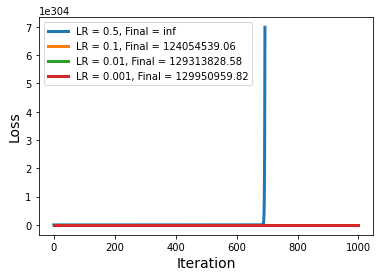

In [25]:
losses = {}
for lr in [0.5, 0.1, 0.01, 0.001]:
    model = LinearRegression(learning_rate=lr)
    model.fit(X_train, y_train)
    losses[f'LR={str(lr)}'] = model.loss
    
    
xs = np.arange(len(model.loss))

plt.plot(xs, losses['LR=0.5'], lw=3, label=f"LR = 0.5, Final = {losses['LR=0.5'][-1]:.2f}")
plt.plot(xs, losses['LR=0.1'], lw=3, label=f"LR = 0.1, Final = {losses['LR=0.1'][-1]:.2f}")
plt.plot(xs, losses['LR=0.01'], lw=3, label=f"LR = 0.01, Final = {losses['LR=0.01'][-1]:.2f}")
plt.plot(xs, losses['LR=0.001'], lw=3, label=f"LR = 0.001, Final = {losses['LR=0.001'][-1]:.2f}")
# plt.title('Loss per iteration (MSE) for different learning rates with python decimal operations', size=20)
plt.xlabel('Iteration', size=14)
plt.ylabel('Loss', size=14)
plt.legend()
plt.savefig("python-mse.pdf")
plt.show()

In [14]:
model = LinearRegression(learning_rate=0.5)
model.fit(X_train, y_train)
preds = model.predict(X_test)

model._mean_squared_error(y_test, preds)

partial_w printing [-1.86081167 -0.10932439 -4.98456952 -3.71875091 -1.31370059 -0.90096535
  3.11643901 -3.2784867  -4.48542634 -3.52161783]
partial_d printing -307.4730878186969
partial_w printing [-1.40109818 -0.04224962 -4.42068767 -3.33102525 -1.46173908 -1.12718263
  2.78853908 -3.1298463  -4.07835449 -2.91096596]
partial_d printing 0.030714767988606596
partial_w printing [-1.38678147 -0.03288846 -4.39350601 -3.30861824 -1.44009211 -1.1065055
  2.76704292 -3.0995048  -4.04818504 -2.8849623 ]
partial_d printing 0.026309052926111687
partial_w printing [-1.37259085 -0.02362791 -4.36653167 -3.28638664 -1.41866771 -1.08604887
  2.74572493 -3.06944194 -4.01826796 -2.85917669]
partial_d printing 0.026123232093972184
partial_w printing [-1.35853126 -0.01446781 -4.33977014 -3.26433389 -1.3974615  -1.06580733
  2.72458768 -3.03965681 -3.98860611 -2.83361515]
partial_d printing 0.025938877247229618
partial_w printing [-1.3446015  -0.00540724 -4.31321959 -3.24245844 -1.37647143 -1.04577883
 

  0.77201598 -0.47471709 -1.25511147 -0.52063674]
partial_d printing 0.008465519547024979
partial_w printing [-0.14744225  0.63993891 -1.7200738  -1.13960333  0.2662501   0.46377702
  0.76712418 -0.46926822 -1.24826127 -0.51512039]
partial_d printing 0.008419332098380358
partial_w printing [-0.14492898  0.64047643 -1.71278205 -1.1338888   0.26881708  0.4657624
  0.7622701  -0.46387252 -1.24146344 -0.50965008]
partial_d printing 0.008373472267293059
partial_w printing [-0.14244083  0.6409966  -1.70553674 -1.12821305  0.27134661  0.46771181
  0.75745341 -0.45852949 -1.23471752 -0.50422542]
partial_d printing 0.008327937363074536
partial_w printing [-0.13997757  0.64149959 -1.69833751 -1.12257577  0.2738391   0.46962564
  0.75267379 -0.45323866 -1.22802308 -0.49884601]
partial_d printing 0.008282724718720465
partial_w printing [-0.13753898  0.64198558 -1.69118399 -1.11697666  0.27629492  0.47150425
  0.74793094 -0.44799953 -1.22137967 -0.49351146]
partial_d printing 0.008237831690280152
p

partial_w printing [ 0.06107068  0.55353649 -0.83387331 -0.47388889  0.36457711  0.46740925
  0.24784737 -0.00329841 -0.5111776   0.0295586 ]
partial_d printing 0.003220403221356263
partial_w printing [ 0.0612683   0.55269445 -0.8314374  -0.47218757  0.36406983  0.46654763
  0.24670204 -0.0027293  -0.5094845   0.03056255]
partial_d printing 0.003207691537582129
partial_w printing [ 0.06146239  0.55185147 -0.82901182 -0.47049457  0.36355958  0.46568386
  0.24556368 -0.00216751 -0.50780086  0.0315584 ]
partial_d printing 0.0031950464323318964
partial_w printing [ 0.06165298  0.55100757 -0.82659651 -0.46880982  0.36304643  0.464818
  0.24443223 -0.00161295 -0.5061266   0.0325462 ]
partial_d printing 0.00318246744652652
partial_w printing [ 0.06184009  0.55016278 -0.8241914  -0.46713328  0.36253041  0.46395008
  0.24330764 -0.00106555 -0.50446167  0.03352603]
partial_d printing 0.003169954124803517
partial_w printing [ 6.20237612e-02  5.49317130e-01 -8.21796441e-01 -4.65464888e-01
  3.6201

partial_w printing [ 0.05971524  0.37672964 -0.47505775 -0.23774255  0.23772396  0.28052229
  0.1037323   0.02803042 -0.2860734   0.1298286 ]
partial_d printing 0.0015070107835311734
partial_w printing [ 0.05961419  0.37598707 -0.47390845 -0.23704208  0.23717698  0.27975765
  0.10335253  0.02797612 -0.2854232   0.12997706]
partial_d printing 0.0015021068634214136
partial_w printing [ 0.05951287  0.37524559 -0.47276254 -0.23634409  0.23663102  0.27899454
  0.10297438  0.0279212  -0.28477527  0.13012386]
partial_d printing 0.0014972215389124676
partial_w printing [ 0.05941131  0.3745052  -0.47162    -0.23564858  0.23608608  0.27823294
  0.10259786  0.02786567 -0.2841296   0.13026901]
partial_d printing 0.001492354717309305
partial_w printing [ 0.05930949  0.3737659  -0.47048083 -0.23495553  0.23554218  0.27747286
  0.10222294  0.02780954 -0.28348617  0.13041254]
partial_d printing 0.0014875063064869404
partial_w printing [ 0.05920742  0.3730277  -0.46934499 -0.23426492  0.23499932  0.276

partial_w printing [ 0.03716099  0.24402815 -0.29040536 -0.13109797  0.14559592  0.15165277
  0.04883713  0.01159524 -0.18494438  0.13683197]
partial_d printing 0.000775756779880691
partial_w printing [ 0.03706259  0.24351552 -0.28975396 -0.13074492  0.14526902  0.15119063
  0.04866356  0.0115194  -0.18459466  0.13679073]
partial_d printing 0.0007733939578184508
partial_w printing [ 0.03696433  0.24300388 -0.28910418 -0.13039293  0.14494302  0.15072969
  0.04849055  0.0114437  -0.18424581  0.13674907]
partial_d printing 0.0007710386661681557
partial_w printing [ 0.03686621  0.24249322 -0.28845602 -0.13004199  0.14461793  0.15026996
  0.04831809  0.01136813 -0.18389785  0.13670698]
partial_d printing 0.000768690877296175
partial_w printing [ 0.03676824  0.24198355 -0.28780946 -0.1296921   0.14429373  0.14981141
  0.04814619  0.01129271 -0.18355075  0.13666449]
partial_d printing 0.000766350563658732
partial_w printing [ 0.03667041  0.24147486 -0.28716451 -0.12934326  0.14397043  0.14935

printing y_hat [183.91708659 149.05578607 226.78432401  97.12245392  66.08969655
  55.98437886 191.95356583 259.91332352 181.47555477  99.23506988
  72.07991331 191.34030626 105.16815017 285.37596736  92.6158386
 151.87039248  97.60720888 125.82854046 130.26706243 173.04097814
 178.92840654 116.66678226 199.94020754 201.58189459 214.5953105
 196.57089842 155.29961099 143.57788318 134.63913757 110.92542243
 160.92699676 163.96867945  96.59647198  69.37088393 160.73668563
 132.52073465 181.65814091 166.47403268 111.35880393 189.11418174
  92.44280298 129.48239501  89.81839559 227.20506326 227.04794845
 233.22599977 162.8463961  289.49314393 161.90627973  75.11896672
 221.18456978  89.2294545  176.61963672 227.25348119  98.04889392
 226.92540295 205.59685948 154.02343394 213.33357448 138.96122896
 155.26093308 171.37935232 230.98386143 123.31648243 199.25039429
  98.38719128 174.63232455 144.91137641  95.61118749 129.92171751
 152.14576672 151.89664041  78.44411465  73.35211292 143.273980

2866.910611363957

In [15]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# lr_model = LinearRegression()
# lr_model.fit(X_train, y_train)
# lr_preds = lr_model.predict(X_test)

# mean_squared_error(y_test, lr_preds)

In [16]:


X_train_num = np.dot(X_train,1000).astype(int)
X_test_num = np.dot(X_test,1000).astype(int)
y_train_num = y_train
y_test_num = y_test

In [17]:
model = LinearRegression()
model.fit(X_train_num, y_train)
preds = model.predict(X_test_num)
mean_squared_error(y_test, preds)

partial_w printing [-1826.49858357  -114.76487252 -4959.59773371 -3700.74220963
 -1317.86968839  -904.34560907  3059.09348442 -3329.86402266
 -4461.96033994 -3497.65439093]
partial_d printing -307.4730878186969
partial_w printing [ 318341.65226525  205429.74726127  586961.42491345  487357.49744689
  446179.6098545   424341.82106878 -463082.77993981  643209.95555217
  645730.33379868  568717.4388752 ]
partial_d printing 329.0319870956346
partial_w printing [-5.58294117e+07 -4.25535512e+07 -9.01455617e+07 -7.59793310e+07
 -9.10070111e+07 -8.97219525e+07  7.65421681e+07 -1.17075049e+08
 -1.07679023e+08 -9.50986222e+07]
partial_d printing -84913.73755478465
partial_w printing [ 9.80244989e+09  7.66697928e+09  1.52382092e+10  1.28141898e+10
  1.67940173e+10  1.66748282e+10 -1.31632989e+10  2.08406661e+10
  1.86958222e+10  1.64158241e+10]
partial_d printing 13493882.484309364
partial_w printing [-1.72461719e+12 -1.35172834e+12 -2.65309856e+12 -2.22571095e+12
 -3.00695092e+12 -2.99010352e+12 

<ipython-input-6-e42b4d11c682>:22: RuntimeWarning: overflow encountered in double_scalars
  error += (y[i] - y_hat[i]) ** 2


partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d printing nan
partial_w printing [nan nan nan nan nan nan nan nan nan nan]
partial_d print

NameError: name 'mean_squared_error' is not defined